In [1]:
import h5py
f = h5py.File('free_evol.h5', 'r')

In [2]:
list(f.keys())

['QERes']

In [3]:
qeres_group = f['/QERes']
qeres_group

<HDF5 group "/QERes" (2 members)>

In [4]:
type(qeres_group)

h5py._hl.group.Group

In [5]:
qeres_group.keys()

<KeysViewHDF5 ['states', 't']>

In [6]:
# Get number of members in the group
num_members = len(qeres_group)
# Print information about the group members
print(f"Group /QERes has {num_members} members:")
# num_members

Group /QERes has 2 members:


In [7]:
for name, obj in qeres_group.items():
    print(f"- {name}: ({type(obj)})")

- states: (<class 'h5py._hl.dataset.Dataset'>)
- t: (<class 'h5py._hl.dataset.Dataset'>)


In [8]:
def get_member(qeres_group, member_name):
  if member_name in qeres_group.keys():
      member = qeres_group[member_name]
      # Check the type of the member (dataset or group)
      if isinstance(member, h5py.Dataset):
        # Read data from the dataset
        data = member[:]
        print(f"Data of member '{member.name}':")
        # print(data)
        return data
      elif isinstance(member, h5py.Group):
        # Access data or subgroups within the member group
        # ... (similar logic as above)
        print(f"Member '{member.name}' has h5py.Group type")
      else:
        print(f"Member '{member.name}' has an unsupported type")
  else:
    print(f"Member 'member_name' does not exist in the group")

In [9]:
# Gate time = 30 ns, So first capture state after unitary, 
# then capture after DD sequence(30*4=120) for 10 iterations, t=1230,
# then capture after final unitary 
get_member(qeres_group, 't')

Data of member '/QERes/t':


array([  30.,  150.,  270.,  390.,  510.,  630.,  750.,  870.,  990.,
       1110., 1230., 1260.])

In [10]:
states = get_member(qeres_group, 'states')
print(f"NUM STATES : {len(states)}")
print(states)

# states[0]

Data of member '/QERes/states':
NUM STATES : 12
[[[ 5.06192071e-01-1.39061752e-18j  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j -5.23407317e-06+5.05733041e-24j
    0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    7.21412462e-06+1.95481247e-24j ...  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
  ...
  [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j ... -4.71631281e-11-4.41354718e-29j
    0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
  [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
    0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+

In [23]:
print(f"LEN STATE 0 : {len(states[0])}")
print(f"STATE 0 : {states[0]}")


LEN STATE 0 : 16
SUM STATE 0 : (1.0264162764896285+1.3451054848956663e-17j)
STATE 0 : [[ 5.06192071e-01-1.39061752e-18j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   1.32080153e-02-4.96815008e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -5.23407317e-06+5.05733041e-24j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -5.62966137e-08+5.13593447e-06j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.000

In [12]:
print(f"LEN STATE 00 : {len(states[0][0])}")
print(f"STATE 00 : {states[0][0]}")

LEN STATE 00 : 16
STATE 00 : [0.50619207-1.39061752e-18j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.01320802-4.96815008e-01j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j
 0.        +0.00000000e+00j 0.        +0.00000000e+00j]


In [13]:
# print(f"LEN STATE 0_00 : {len(states[0][0][0])}")
print(f"STATE 0_00 : {states[0][0][0]}")

STATE 0_00 : (0.50619207084102-1.3906175158218042e-18j)


In [30]:
#  0000, 0001, 0010, 0011, 1000, 1001, 1010, 1011
import numpy as np
fidelities = []
fidilities2 = []
for t in range(len(states)):
    prob = [ np.abs(states[t][index][index]) for index in [0b0000, 0b0001, 0b0010, 0b0011, 0b1000, 0b1001, 0b1010, 0b1011] ]
    fidelities.append(sum(prob))
    fidilities2.append(states[t][0][0])

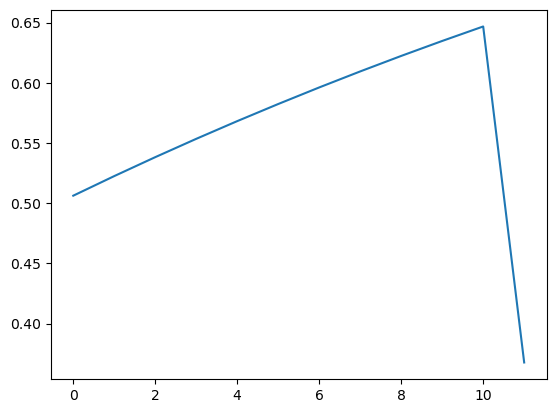

In [31]:
import matplotlib.pyplot as plt
plt.plot(fidelities)


c:\Users\manvi\anaconda3\envs\scqubit-env\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\manvi\anaconda3\envs\scqubit-env\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


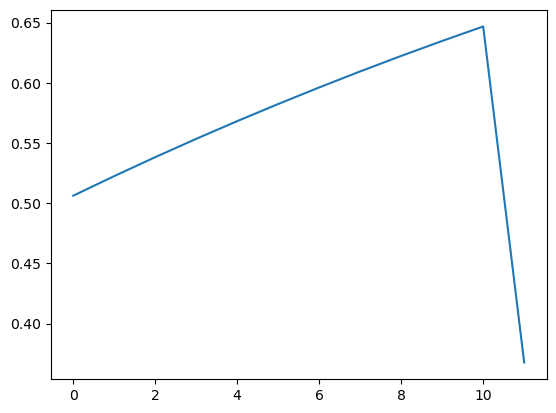

In [32]:
plt.plot(fidilities2)